In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# 1. Handle Missing Values

In [39]:
df = pd.read_csv("adult_with_headers.csv")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
print(df.isnull().sum().sum())
print(df.duplicated().sum())

0
24


In [42]:
df.drop_duplicates(inplace=True, ignore_index=True)
print(df.duplicated().sum())

0


In [ ]:
std_data = df.copy()
numerical_cols = [col for col in std_data.columns if std_data[col].dtype == "int64"]
print(numerical_cols)
std_sca = StandardScaler()
std_data[numerical_cols] = std_sca.fit_transform(std_data[numerical_cols])
std_data.head()


'''
> When to use Standard Scaling?
 - When we are dealing with Normally distributed data and Gradient Based models, e.g., (Linear Regression/ Logistic Regression)
'''

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


'\n> When to use Standard Scaling?\n - When we are dealing with Normally distributed data and Gradient Based models, e.g., (Linear Regression/ Logistic Regression)\n'

In [ ]:
minmax_data = df.copy()
min_max = MinMaxScaler()
minmax_data[numerical_cols] = min_max.fit_transform(minmax_data[numerical_cols])
minmax_data.head()

'''
> When to use Min-Max Scaling?
 - When we need to preserve the order and ranges of a feature even after scaling, and generally not dealing with extreme outliers.
'''

'\n> When to use Min-Max Scaling?\n - When we need to preserve the order and ranges of a feature even after scaling, and generally not dealing with extreme outliers.\n'

# 2. Encoding

In [45]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
categorical_cols = [df["education"].unique(),
df["workclass"].unique(),
df["education_num"].unique(), 
df["marital_status"].unique(), 
df["relationship"].unique(), 
df["occupation"].unique(), 
df["race"].unique(), 
df["sex"].unique(), 
df["native_country"].unique(), 
df["income"].unique()]

[col for col in categorical_cols if len(col)<5]

[array([' Male', ' Female'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object)]

In [47]:
'''
One-Hot Encoding ()
'''
one_hot_enc = OneHotEncoder();
sex_encoded=pd.DataFrame(one_hot_enc.fit_transform(df[['sex']]).toarray(),columns=[[col.strip() for col in df["sex"].unique()]])
result = df.join(sex_encoded)
result.drop(columns=["sex"]).head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,"(Male,)","(Female,)"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0.0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0.0,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1.0,0.0


In [ ]:

encoded = pd.get_dummies(df["sex"],dtype='int')
dfcopy = df.copy()
dfcopy.drop(columns=["sex"], inplace=True)
result = dfcopy.join(encoded)
result.head()


'''
Pros of One-Hot Encoding
 - One-hot encoding prevents fake hierarchy
 - Each category gets its own independent weight

Cons of One-Hot Encoding
 - Increases the number of columns in a table for features having more categories
 - Most values are 0. 
'''

'\nPros of ONe_Hot Encoding\n\n'

In [49]:
df["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
'''
Ordinal Encoding
'''
ord_enc = OrdinalEncoder(categories=[[' <=50K', ' >50K']])
# Ordinal Encoding with OrdEncoder()
dfcopy = df.copy()
dfcopy['income'] = ord_enc.fit_transform(dfcopy[['income']])
dfcopy.tail()



'''
Pros of Label Encoding
 - Uses one column instead of many
 - Suitable for ordinal data

Cons of Label Encoding
 - Introduces false ordering for nominal data
'''


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0.0
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1.0
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0.0
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0.0
32536,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1.0


# 3. Data Exploration

In [54]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


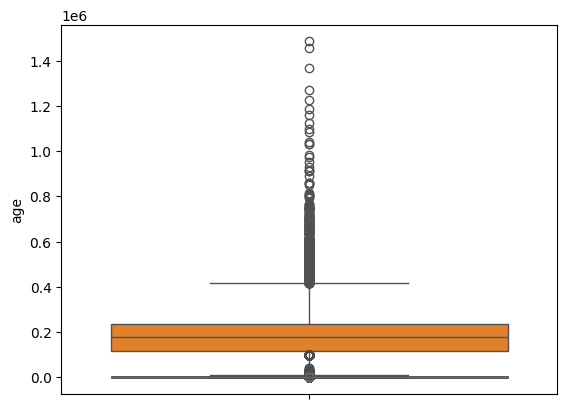

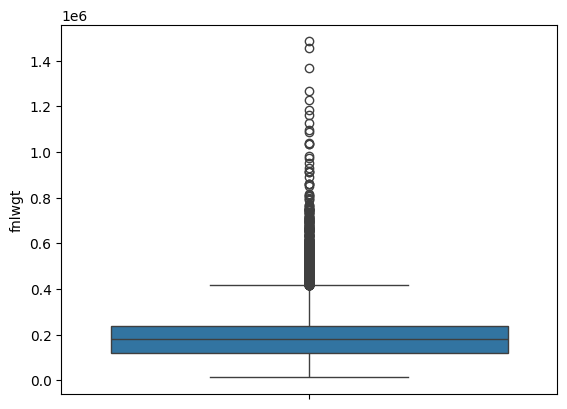

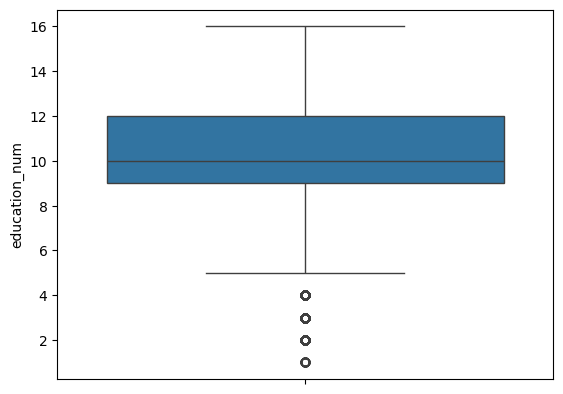

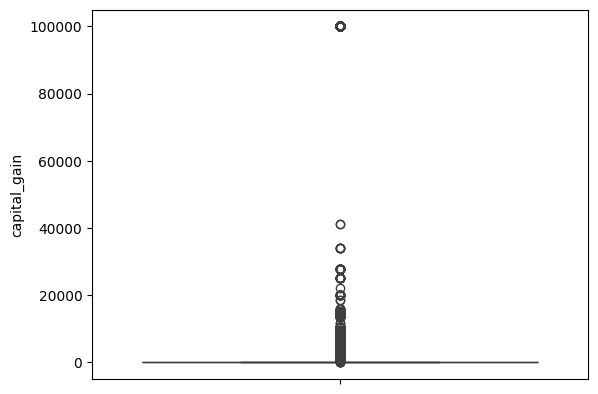

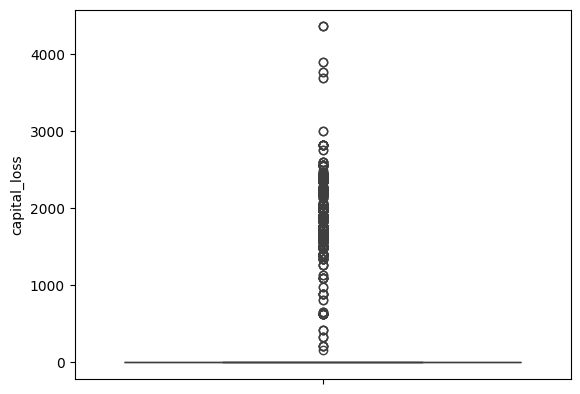

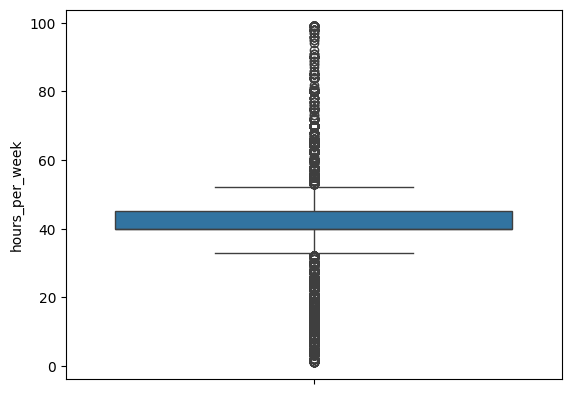

In [58]:
numerical_cols = [col for col in std_data.columns if std_data[col].dtype != "object"]

for col in numerical_cols:
    sns.boxplot(data=df, y=col)
    plt.show()

In [ ]:
'''
All the features below have outliers
'''
print(df["age"].unique())
print(df["hours_per_week"].unique())
print(df["capital_loss"].unique())
print(df["capital_gain"].unique())
print(df["education_num"].unique())
print(df["fnlwgt"].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]
[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411]
[ 2174     0 14084  5

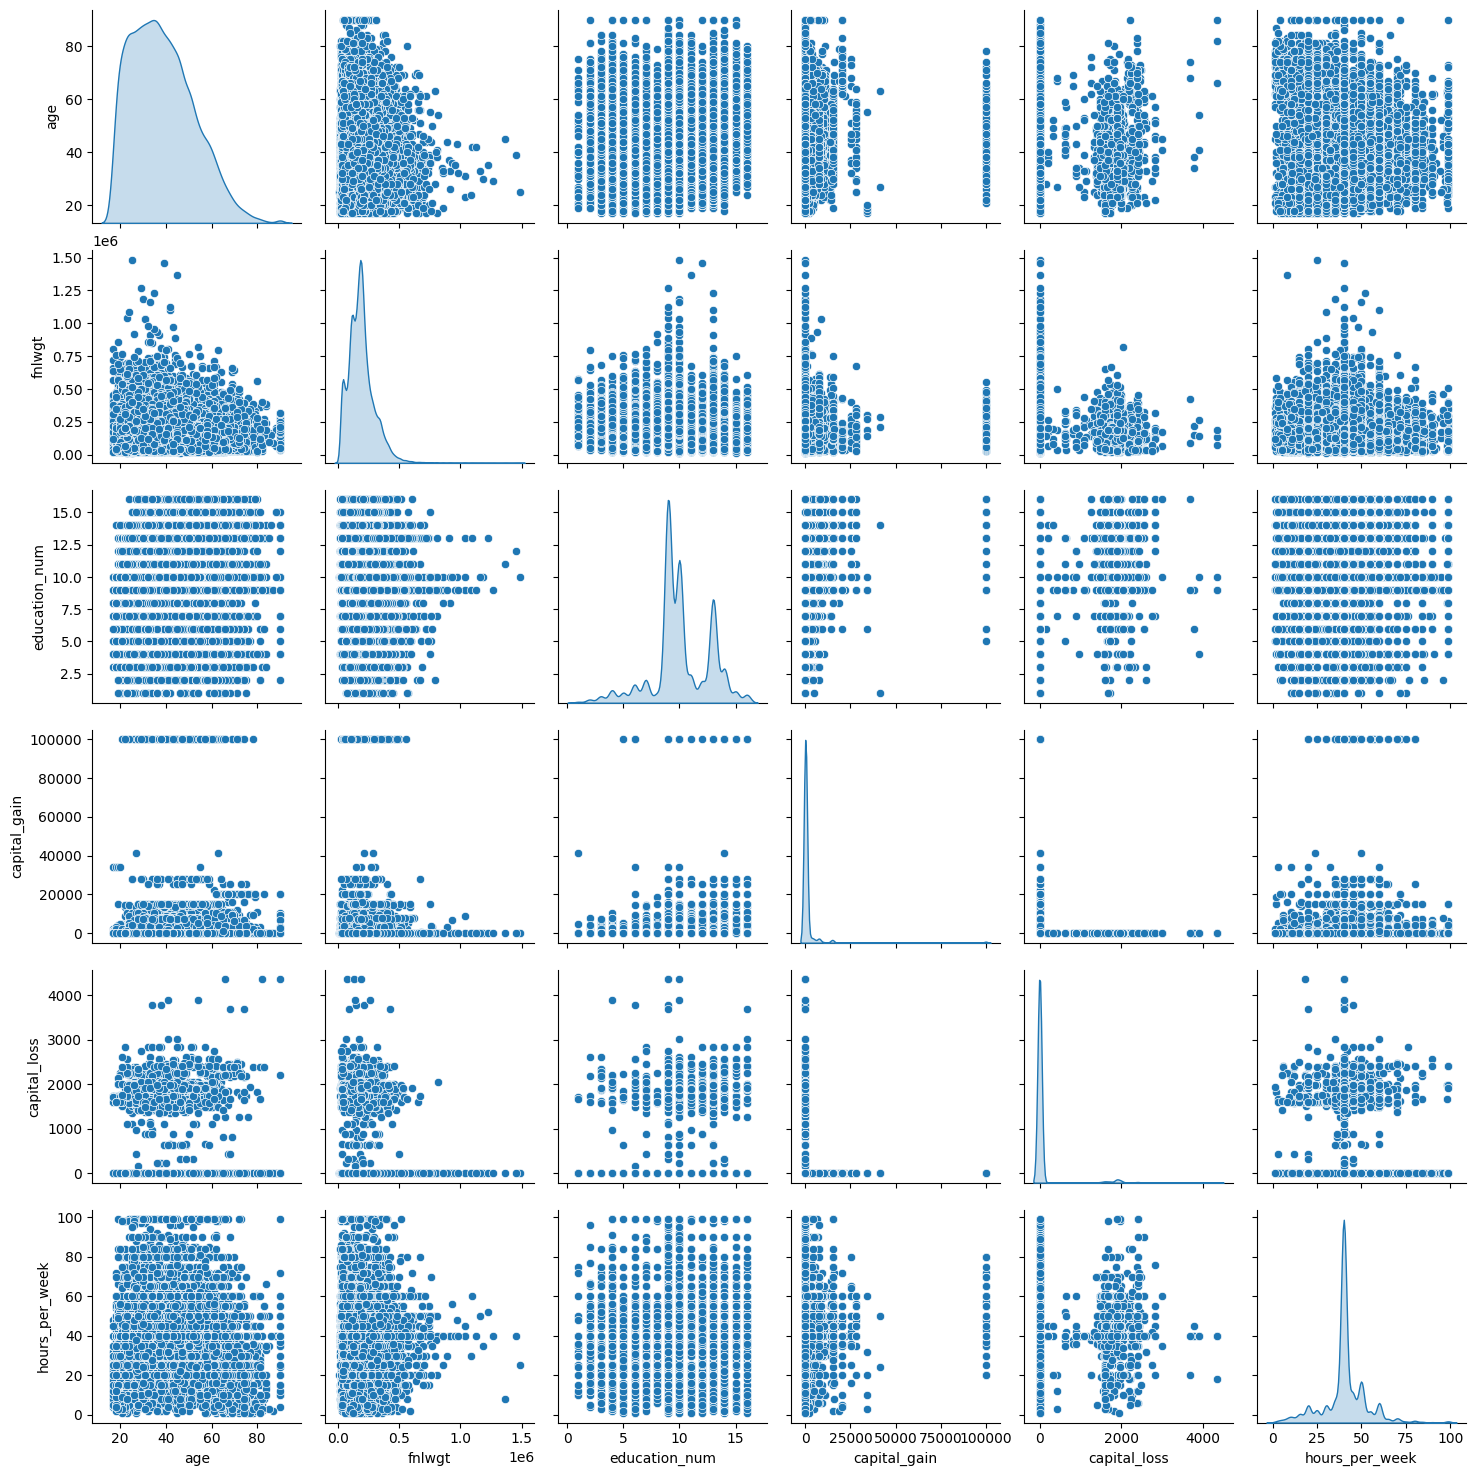

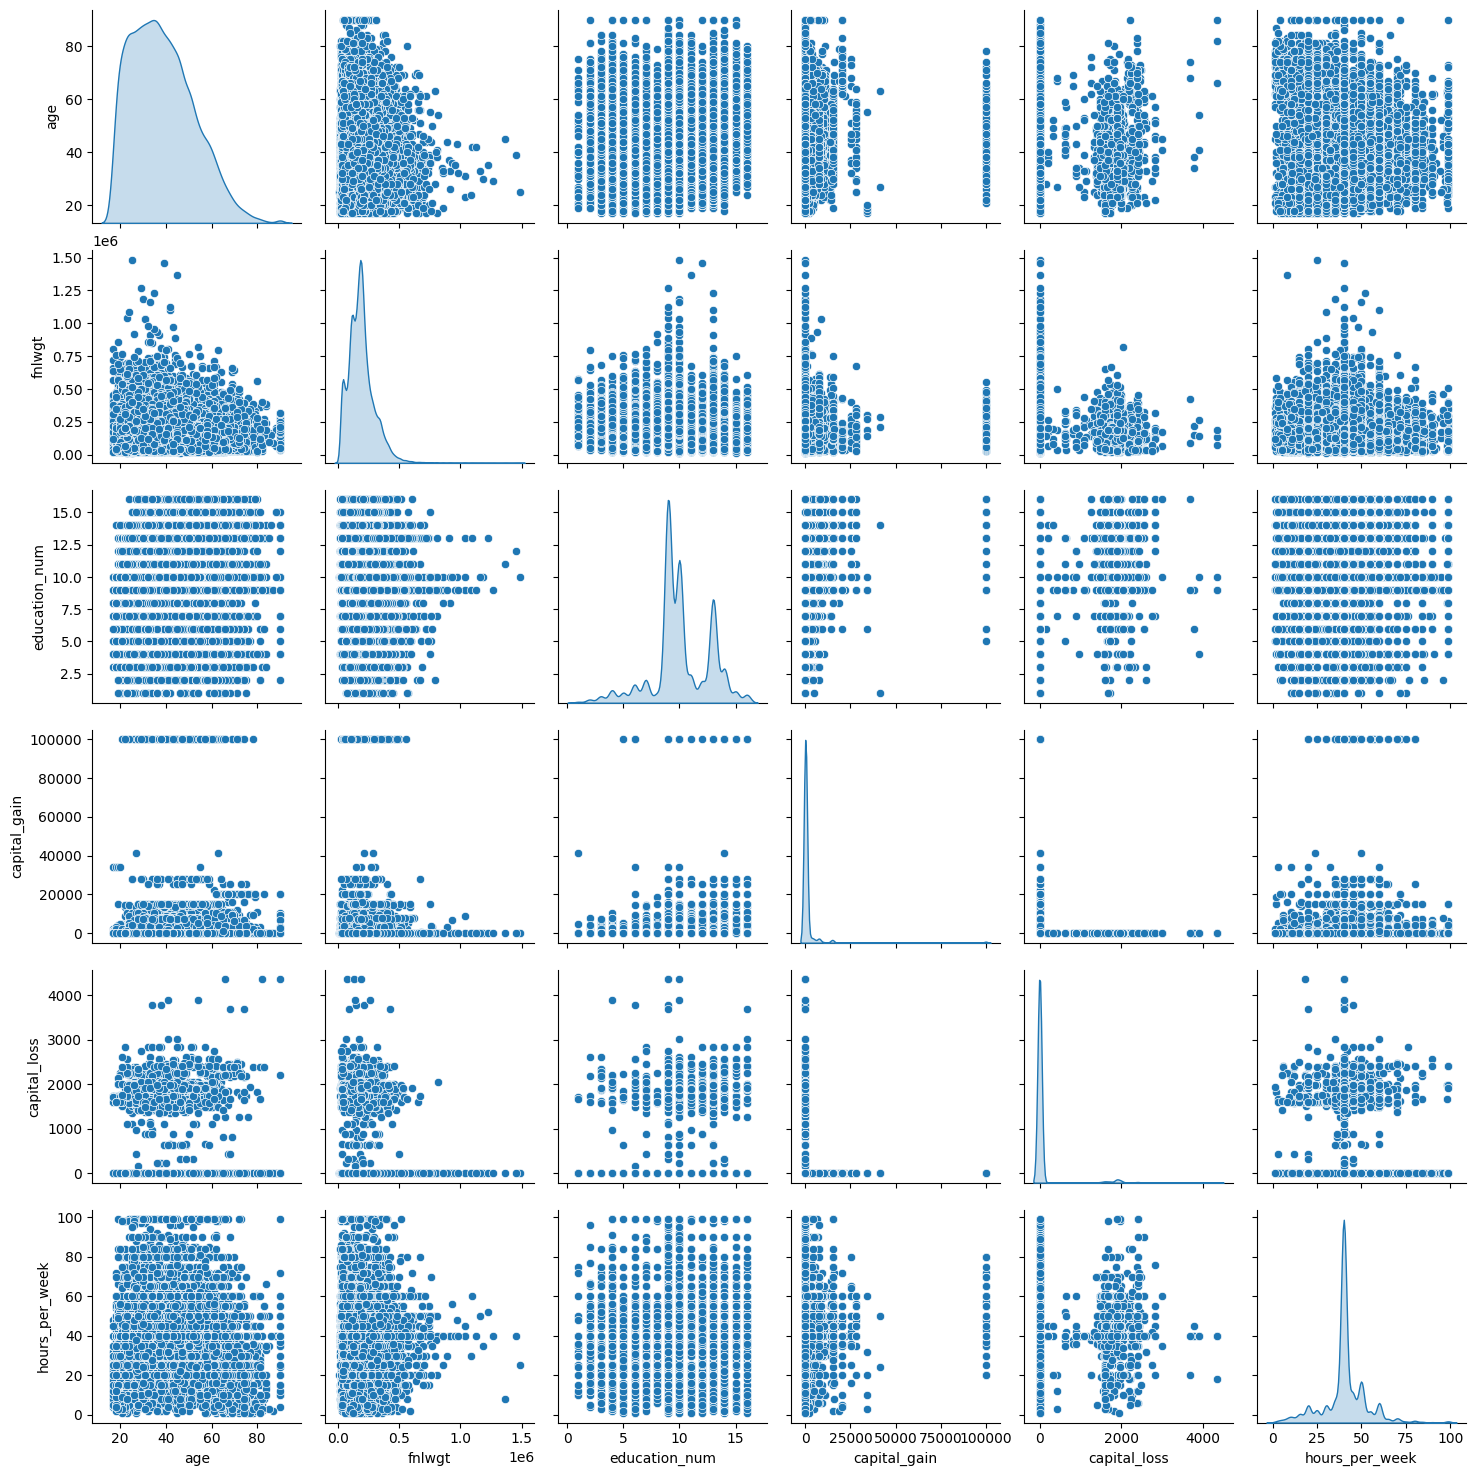

In [71]:
sns.pairplot(df[numerical_cols], diag_kind="kde")
plt.show()

In [69]:
df.groupby("age")[["hours_per_week"]].agg(["mean","median","sum","min","max","count"])

hours_per_week                            
              mean median    sum min max count
age                                           
17       21.367089   20.0   8440   4  48   395
18       25.912727   25.0  14252   2  72   550
19       30.718927   30.0  21749   3  99   708
20       32.309840   35.0  24297   2  84   752
21       34.045961   40.0  24445   1  98   718
..             ...    ...    ...  ..  ..   ...
85       29.333333   35.0     88   3  50     3
86       40.000000   40.0     40  40  40     1
87        2.000000    2.0      2   2   2     1
88       40.000000   40.0    120  40  40     3
90       36.857143   40.0   1548   4  99    42

[73 rows x 6 columns]

In [65]:
df.groupby("hours_per_week")[["capital_loss", "capital_gain"]].agg(["mean","median","sum","min","max","count"])

capital_loss                               capital_gain         \
                       mean median    sum min   max count         mean median   
hours_per_week                                                                  
1                 97.200000    0.0   1944   0  1944    20   162.850000    0.0   
2                 56.750000    0.0   1816   0  1816    32  1047.031250    0.0   
3                 94.589744    0.0   3689   0  1668    39  1000.666667    0.0   
4                 30.518519    0.0   1648   0  1648    54   441.518519    0.0   
5                 87.366667    0.0   5242   0  2206    60   432.266667    0.0   
...                     ...    ...    ...  ..   ...   ...          ...    ...   
95                 0.000000    0.0      0   0     0     2     0.000000    0.0   
96                 0.000000    0.0      0   0     0     5  1537.600000    0.0   
97                 0.000000    0.0      0   0     0     2     0.000000    0.0   
98               331.727273    0.0   3649   0  1977    11   218.818182    0.0   
99               125.717647    0.0  10686   0  2415    85   799.529412    0.0   

                                        
                  sum min    max count  
hours_per_week                          
1                3257   0   1848    20  
2               33505   0  18481    32  
3               39026   0  34095    39  
4               23842   0  20051    54  
5               25936   0  20051    60  
...               ...  ..    ...   ...  
95                  0   0      0     2  
96               7688   0   7688     5  
97                  0   0      0     2  
98               2407   0   2407    11  
99              67960   0  15024    85  

[94 rows x 12 columns]

In [66]:
df.groupby("age")[["education_num"]].agg(["mean","median","sum","min","max","count"])


education_num                           
             mean median   sum min max count
age                                         
17       6.648101    7.0  2626   3  10   395
18       8.152727    8.0  4484   3  14   550
19       9.093220    9.0  6438   1  13   708
20       9.344415   10.0  7027   1  14   752
21       9.445682   10.0  6782   1  14   718
..            ...    ...   ...  ..  ..   ...
85      10.333333    9.0    31   9  13     3
86      14.000000   14.0    14  14  14     1
87       9.000000    9.0     9   9   9     1
88      13.333333   15.0    40  10  15     3
90       9.880952    9.0   415   2  15    42

[73 rows x 6 columns]

In [68]:
pd.crosstab(index=[df.age, df.income],columns=df.sex, margins=True, margins_name="Total").head()

sex          Female   Male  Total
age income                       
17  <=50K       186    209    395
18  <=50K       268    282    550
19  <=50K       354    352    706
    >50K          1      1      2
20  <=50K       362    390    752

# 4. Feature Engineering

In [75]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:

print(df["occupation"].unique())
print(df["workclass"].unique())
print(df["age"].unique())
print(df["relationship"].unique())
print(df["race"].unique())
print(df["fnlwgt"].max()/1000)
print(df["fnlwgt"].min()/1000)

df.columns

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
1484.705
12.285


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [111]:
'''
1) Under-aged - A binary indicator feature that flags whether a person is legally under 18 years old (1 if age < 18, else 0), helping the model distinguish minors from adults.
2) Capital Profits - A derived numerical feature representing net capital outcome, calculated as capital gain minus capital loss, capturing overall investment profit or loss.
'''
df["Under-aged"] = [1 if age < 18 else 0 for age in df["age"]]
df["Capital Profit"] = [df.iloc[i]["capital_gain"] - df.iloc[i]["capital_loss"] for i in range(len(df))]
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Under-aged,Capital Profit
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0,0
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0


In [112]:
'''
From a glance at the pairplot above, we can observe that "age" column is slightly skewed to the right. So we can apply log-transformation to that column. 
'''
df["age_log"] = np.log(df["age"])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Under-aged,Capital Profit,age_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2174,3.663562
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,3.912023
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,3.637586
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,3.970292
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,3.332205


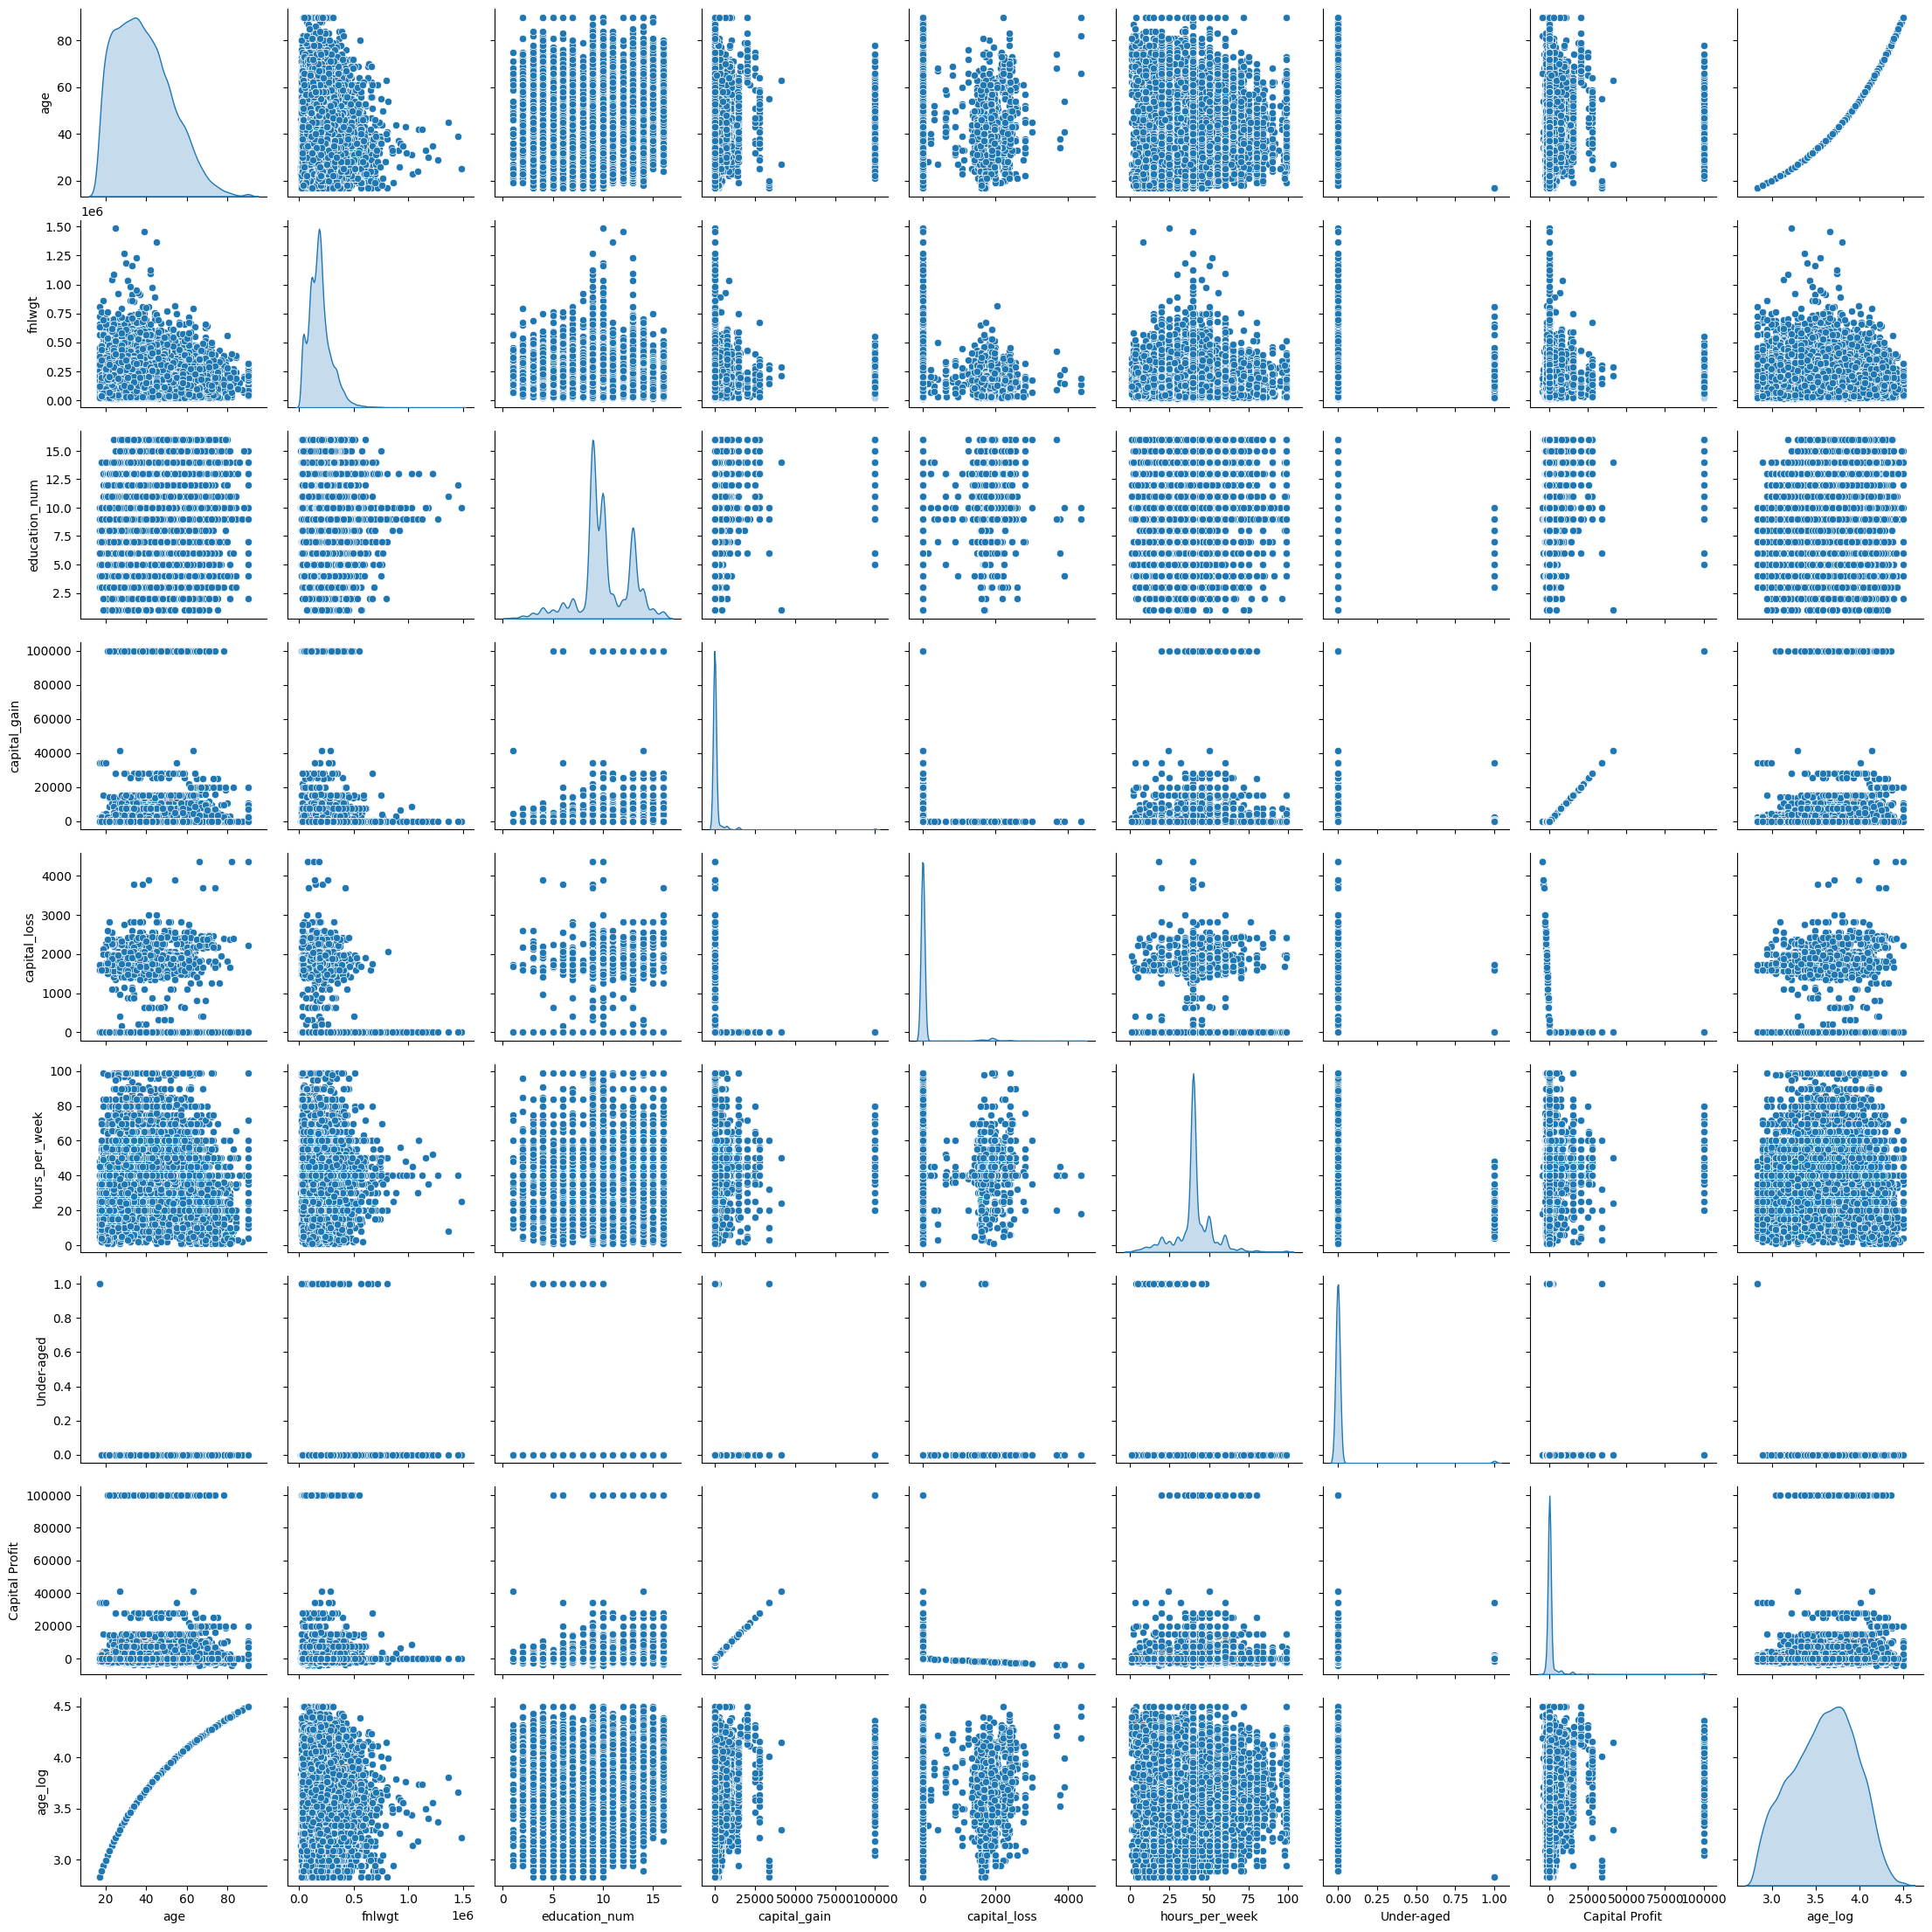

In [ ]:
# We can see that after applying log transformation to "age", we have fairly Normally distributed data on "age_log"

numerical_cols = [col for col in df.columns if df[col].dtype != "object"]
sns.pairplot(df[numerical_cols], diag_kind="kde")
plt.show()